## 0. Preparation

### Importing packages

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import random
import time
import winsound
import json
import plotly.express as px
from datetime import datetime
from scrapy import Selector

In [2]:
from datetime import datetime  
from datetime import timedelta

### Defining Constants & Functions

In [3]:
DF_LTBX_DIR = 'C:\\Users\\willi\\Documents\\Data Science\\Projeto Críticas\\Letterboxd\\Most Popular Films CSVs\\2023'

## 1. Reading Files

In [4]:
last_date = '20230309'

filename = DF_LTBX_DIR + '\\LTBX_ALL_FILMS_POP_FROM_20221225_TO_' + last_date + '.csv'
ALL_FILMS_POP_DF = pd.read_csv(filename).drop('Unnamed: 0',axis=1)

filename = DF_LTBX_DIR + '\\LTBX_ALL_FILM_RATINGS_FROM_20221225_TO_' + last_date + '.csv'
ALL_FILM_RATINGS_DF = pd.read_csv(filename).drop('Unnamed: 0',axis=1)

filename = DF_LTBX_DIR + '\\LTBX_ALL_FILM_NUMBERS_FROM_20221225_TO_' + last_date + '.csv'
ALL_FILM_NUMBERS_DF = pd.read_csv(filename).drop('Unnamed: 0',axis=1)

## 2. Analyzing Data from Popularity

### 2.1 What's Trending? New or Reappearing Titles

### Most Recent Entries
#### What are the new titles that entered (NEW) the Top 1000 lists during the last day?

In [5]:
#Movies that appeared on last day
last_day_index = ALL_FILMS_POP_DF.FILE_INDEX.unique()[-1]
ALL_FILMS_POP_DF[(ALL_FILMS_POP_DF.FILE_INDEX == last_day_index) & (ALL_FILMS_POP_DF.POP_DIFF == 'NEW')]

,TITLE,SHORT_URL,POP_INDEX,ID,DATE,MODE,FILE_INDEX,POP_DIFF
300377,The Hangover Part II,the-hangover-part-ii,1002,19987,2023-03-09 23:34:29.586170,YEAR,74,NEW
301364,The Red Suitcase,the-red-suitcase-2022,981,930946,2023-03-09 23:33:00.052487,MONTH,74,NEW
301385,Re/Member,re-member,1002,893218,2023-03-09 23:33:00.052487,MONTH,74,NEW
301389,The Host,the-host,1006,51125,2023-03-09 23:33:00.052487,MONTH,74,NEW
301390,Chris Rock: Selective Outrage,chris-rock-selective-outrage,1007,961316,2023-03-09 23:33:00.052487,MONTH,74,NEW
302352,Burlesque,burlesque,961,22775,2023-03-09 23:31:23.944988,WEEK,74,NEW
302374,Catherine Called Birdy,catherine-called-birdy,983,713013,2023-03-09 23:31:23.944988,WEEK,74,NEW
302380,65,65,989,624070,2023-03-09 23:31:23.944988,WEEK,74,NEW
302391,R.I.P.D.,ripd,1000,16088,2023-03-09 23:31:23.944988,WEEK,74,NEW
302393,The Fugitive,the-fugitive-1993,1002,48823,2023-03-09 23:31:23.944988,WEEK,74,NEW


In [6]:
last_day_index

74

### New 'This Week' Discoveries
#### What are the new titles that people discovered during the last week?

In [7]:
# NEW films are titles that never appeared before at the top 1000 lists (except on the first read file)
N = 7 # The range equals N days (7 to cover the last week)
last_file_index = max(ALL_FILMS_POP_DF.FILE_INDEX) # most recent FILE_INDEX 
first_file_index = last_file_index - (N-1) # the initial FILE_INDEX of the intended range
FILTERED_DF = ALL_FILMS_POP_DF[(ALL_FILMS_POP_DF.FILE_INDEX.between(first_file_index,last_file_index)) & (ALL_FILMS_POP_DF.POP_DIFF == 'NEW')]
FILTERED_DF[FILTERED_DF.MODE.isin(['WEEK'])].sort_values('POP_INDEX').head(15)

,TITLE,SHORT_URL,POP_INDEX,ID,DATE,MODE,FILE_INDEX,POP_DIFF
285722,Chris Rock: Selective Outrage,chris-rock-selective-outrage,459,961316,2023-03-06 06:42:57.871466,WEEK,70,NEW
281779,Daisy Jones & the Six,daisy-jones-the-six,548,985816,2023-03-04 23:00:53.834803,WEEK,69,NEW
285864,This Is Where I Leave You,this-is-where-i-leave-you,601,168112,2023-03-06 06:42:57.871466,WEEK,70,NEW
277848,Paris Is Burning,paris-is-burning,649,31355,2023-03-04 00:57:22.419823,WEEK,68,NEW
277914,Nanpakal Nerathu Mayakkam,nanpakal-nerathu-mayakkam,715,788614,2023-03-04 00:57:22.419823,WEEK,68,NEW
286012,Fourteen,fourteen-2019,749,501419,2023-03-06 06:42:57.871466,WEEK,70,NEW
286038,"Yes, Madam!",yes-madam,775,25238,2023-03-06 06:42:57.871466,WEEK,70,NEW
286060,That Thing You Do!,that-thing-you-do,797,47010,2023-03-06 06:42:57.871466,WEEK,70,NEW
294151,History of the World: Part I,history-of-the-world-part-i,824,46493,2023-03-08 07:03:45.826883,WEEK,72,NEW
290173,Teenage Mutant Ninja Turtles: Mutant Mayhem,teenage-mutant-ninja-turtles-mutant-mayhem,878,542005,2023-03-07 06:56:15.379275,WEEK,71,NEW


### 'This Week' Rediscoveries
#### What are the titles that people rediscovered during the last week?

In [8]:
# OLD films are titles that were at the top 1000 lists at some point, left for at least one week, and then returned.
N = 7 # The range equals N days (7 to cover the last week)
last_file_index = max(ALL_FILMS_POP_DF.FILE_INDEX) # most recent FILE_INDEX 
first_file_index = last_file_index - (N-1) # the initial FILE_INDEX of the intended range
FILTERED_DF = ALL_FILMS_POP_DF[ALL_FILMS_POP_DF.POP_DIFF.isin(['OLD']) & ALL_FILMS_POP_DF.MODE.isin(['WEEK'])]
FILTERED_DF[FILTERED_DF.FILE_INDEX.between(first_file_index,last_file_index)].sort_values('POP_INDEX').head(15)

,TITLE,SHORT_URL,POP_INDEX,ID,DATE,MODE,FILE_INDEX,POP_DIFF
297429,Scream,scream-2022,70,572119,2023-03-08 22:10:08.713657,WEEK,73,OLD
293400,Ratatouille,ratatouille,73,50558,2023-03-08 07:03:45.826883,WEEK,72,OLD
289370,The Hunger Games,the-hunger-games,75,59281,2023-03-07 06:56:15.379275,WEEK,71,OLD
293402,Dune,dune-2021,75,371378,2023-03-08 07:03:45.826883,WEEK,72,OLD
289377,RRR,rrr,82,508037,2023-03-07 06:56:15.379275,WEEK,71,OLD
293421,We Have a Ghost,we-have-a-ghost,94,766523,2023-03-08 07:03:45.826883,WEEK,72,OLD
297504,The Lord of the Rings: The Return of the King,the-lord-of-the-rings-the-return-of-the-king,145,51928,2023-03-08 22:10:08.713657,WEEK,73,OLD
297505,Bodies Bodies Bodies,bodies-bodies-bodies,146,449442,2023-03-08 22:10:08.713657,WEEK,73,OLD
297506,Soul,soul-2020,147,438511,2023-03-08 22:10:08.713657,WEEK,73,OLD
297513,Spider-Man: Homecoming,spider-man-homecoming,154,242710,2023-03-08 22:10:08.713657,WEEK,73,OLD


### 'This Month' Discoveries
#### What are the titles that appeared on the 'This Month' Top 1000 Lists during the last month?

In [9]:
# NEW films are titles that never appeared before at the top 1000 lists (except on the first read file)
# OLD films are titles that were at the top 1000 lists at some point, left for at least one week, and then returned.
N = 7 # The range equals N days (30 to cover the last month)
last_file_index = max(ALL_FILMS_POP_DF.FILE_INDEX) # most recent FILE_INDEX 
first_file_index = last_file_index - (N-1) # the initial FILE_INDEX of the intended range
FILTERED_DF = ALL_FILMS_POP_DF[(ALL_FILMS_POP_DF.FILE_INDEX.between(first_file_index,last_file_index)) & (ALL_FILMS_POP_DF.POP_DIFF.isin(['NEW','OLD']))]
FILTERED_DF[FILTERED_DF.MODE.isin(['MONTH'])].sort_values('POP_INDEX').head(15)

,TITLE,SHORT_URL,POP_INDEX,ID,DATE,MODE,FILE_INDEX,POP_DIFF
296568,Split,split-2016,217,316315,2023-03-08 22:11:40.608099,MONTH,73,OLD
292536,Spider-Man 2,spider-man-2,217,51560,2023-03-08 07:05:14.266813,MONTH,72,OLD
288504,Sharper,sharper,217,641162,2023-03-07 06:57:34.778152,MONTH,71,OLD
296569,Bohemian Rhapsody,bohemian-rhapsody,218,358222,2023-03-08 22:11:40.608099,MONTH,73,OLD
292537,The Dark Knight Rises,the-dark-knight-rises,218,16550,2023-03-08 07:05:14.266813,MONTH,72,OLD
296570,The Great Gatsby,the-great-gatsby-2013,219,285,2023-03-08 22:11:40.608099,MONTH,73,OLD
292538,Fire of Love,fire-of-love-2022,219,819863,2023-03-08 07:05:14.266813,MONTH,72,OLD
292541,Scream,scream-2022,222,572119,2023-03-08 07:05:14.266813,MONTH,72,OLD
296597,Missing,missing-2023,246,688088,2023-03-08 22:11:40.608099,MONTH,73,OLD
292590,Scream 2,scream-2,271,49454,2023-03-08 07:05:14.266813,MONTH,72,OLD


### 'This Year' Discoveries
#### What are the titles appearing on the "This Year" Top 1000 Lists during the last month?

In [10]:
# NEW films are titles that never appeared before at the top 1000 lists (except on the first read file)
# OLD films are titles that were at the top 1000 lists at some point, left for at least one week, and then returned.
N = 7 # The range equals N days (30 to cover the last month)
last_file_index = max(ALL_FILMS_POP_DF.FILE_INDEX) # most recent FILE_INDEX 
first_file_index = last_file_index - (N-1) # the initial FILE_INDEX of the intended range
FILTERED_DF = ALL_FILMS_POP_DF[(ALL_FILMS_POP_DF.FILE_INDEX.between(first_file_index,last_file_index)) & (ALL_FILMS_POP_DF.POP_DIFF.isin(['NEW','OLD']))]
FILTERED_DF[FILTERED_DF.MODE.isin(['YEAR'])].sort_values('POP_INDEX').head(15)

,TITLE,SHORT_URL,POP_INDEX,ID,DATE,MODE,FILE_INDEX,POP_DIFF
295488,Spider-Man: Far from Home,spider-man-far-from-home,145,362977,2023-03-08 22:13:16.272712,YEAR,73,OLD
291460,Creed III,creed-iii,149,601624,2023-03-08 07:06:47.078458,YEAR,72,OLD
295559,The Godfather: Part II,the-godfather-part-ii,216,51816,2023-03-08 22:13:16.272712,YEAR,73,OLD
291528,Your Place or Mine,your-place-or-mine-2023,217,626795,2023-03-08 07:06:47.078458,YEAR,72,OLD
287568,Toy Story 2,toy-story-2,289,51289,2023-03-07 06:58:59.954064,YEAR,71,OLD
291604,Sick,sick-2022,293,745201,2023-03-08 07:06:47.078458,YEAR,72,OLD
291816,Shiva Baby,shiva-baby-2020,505,589093,2023-03-08 07:06:47.078458,YEAR,72,OLD
287784,Scream 4,scream-4,505,23586,2023-03-07 06:58:59.954064,YEAR,71,OLD
295908,Fall,fall-2022,565,887621,2023-03-08 22:13:16.272712,YEAR,73,OLD
291888,Thirteen,thirteen,577,45680,2023-03-08 07:06:47.078458,YEAR,72,OLD


### 'All Time' New Entries
#### What are the titles appearing on the "All Time" Top 1000 Lists during the last N days?

In [11]:
# NEW films are titles that never appeared before at the top 1000 lists (except on the first read file)
# OLD films are titles that were at the top 1000 lists at some point, left for at least one week, and then returned.
N = 7 # The range equals N days (30 to cover the last month)
last_file_index = max(ALL_FILMS_POP_DF.FILE_INDEX) # most recent FILE_INDEX 
first_file_index = last_file_index - (N-1) # the initial FILE_INDEX of the intended range
FILTERED_DF = ALL_FILMS_POP_DF[(ALL_FILMS_POP_DF.FILE_INDEX.between(first_file_index,last_file_index)) & (ALL_FILMS_POP_DF.POP_DIFF.isin(['NEW','OLD']))]
FILTERED_DF[FILTERED_DF.MODE.isin(['ALL'])].sort_values('POP_INDEX')

,TITLE,SHORT_URL,POP_INDEX,ID,DATE,MODE,FILE_INDEX,POP_DIFF
291023,Gangs of New York,gangs-of-new-york-2002,720,49846,2023-03-08 07:08:09.615371,ALL,72,OLD
286992,Yesterday,yesterday-2019,721,444799,2023-03-07 07:00:28.975884,ALL,71,OLD
291304,Cocaine Bear,cocaine-bear,1001,721333,2023-03-08 07:08:09.615371,ALL,72,NEW


### 2.2 What's Trending?

### Highest Hikes
#### What are the titles that are trending up faster during the last N days?

In [12]:
N = 7 # The range equals N days (7 to cover last week, 30 to cover the last month)
last_file_index = max(ALL_FILMS_POP_DF.FILE_INDEX) # most recent FILE_INDEX 
first_file_index = last_file_index - (N-1) # the initial FILE_INDEX of the intended range
FILTERED_DF = ALL_FILMS_POP_DF[(ALL_FILMS_POP_DF.POP_DIFF != 'NEW') & (ALL_FILMS_POP_DF.POP_DIFF != 'OLD') & (ALL_FILMS_POP_DF.FILE_INDEX.between(first_file_index,last_file_index))]
FILTERED_DF.loc[:,'POP_DIFF'] = FILTERED_DF['POP_DIFF'].astype('int')
FILTERED_DF = FILTERED_DF.groupby(by=['SHORT_URL','MODE'])['POP_DIFF'].sum().reset_index().sort_values('POP_DIFF', ascending=False)
FILTERED_DF[FILTERED_DF.MODE == 'WEEK'].head(10)

C:\Users\willi\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,SHORT_URL,MODE,POP_DIFF
2586,scream-vi,WEEK,875
834,demon-slayer-kimetsu-no-yaiba-to-the-swordsmit...,WEEK,770
2193,operation-fortune-ruse-de-guerre,WEEK,761
1029,fall-2022,WEEK,717
1754,living-2022,WEEK,634
2763,speed-racer,WEEK,627
3250,the-heroic-trio,WEEK,501
2922,teenage-mutant-ninja-turtles-mutant-mayhem,WEEK,484
797,daisy-jones-the-six,WEEK,444
1803,lyle-lyle-crocodile,WEEK,404


In [13]:
FILTERED_DF[FILTERED_DF.MODE == 'MONTH'].head(10)

,SHORT_URL,MODE,POP_DIFF
772,creed-iii,MONTH,644
2585,scream-vi,MONTH,574
1028,fall-2022,MONTH,360
769,creed-ii,MONTH,330
2482,rocky-balboa,MONTH,279
1753,living-2022,MONTH,273
2487,rocky-iii,MONTH,272
2490,rocky-iv,MONTH,265
2484,rocky-ii,MONTH,260
955,emily-2022,MONTH,219


In [14]:
FILTERED_DF[FILTERED_DF.MODE == 'YEAR'].head(10)

,SHORT_URL,MODE,POP_DIFF
774,creed-iii,YEAR,612
2587,scream-vi,YEAR,410
771,creed-ii,YEAR,358
2194,operation-fortune-ruse-de-guerre,YEAR,207
2489,rocky-iii,YEAR,193
768,creed,YEAR,184
2486,rocky-ii,YEAR,183
3949,we-have-a-ghost,YEAR,175
2492,rocky-iv,YEAR,154
2584,scream-4,YEAR,142


In [15]:
FILTERED_DF[FILTERED_DF.MODE == 'ALL'].head(10)

,SHORT_URL,MODE,POP_DIFF
765,creed,ALL,63
244,ant-man-and-the-wasp-quantumania,ALL,53
1660,knock-at-the-cabin,ALL,46
1480,infinity-pool,ALL,44
3699,the-whale-2022,ALL,44
2577,scream-3,ALL,38
2581,scream-4,ALL,35
171,all-quiet-on-the-western-front-2022,ALL,34
3836,triangle-of-sadness,ALL,32
722,cocaine-bear,ALL,31


In [16]:
#ALL_FILMS_POP_DF[ALL_FILMS_POP_DF.SHORT_URL=='roald-dahls-matilda-the-musical']

### Steepest Drops
#### What are the titles that are trending down faster during the last N days?

In [17]:
N = 7 # The range equals N days (7 to cover last week, 30 to cover the last month)
last_file_index = max(ALL_FILMS_POP_DF.FILE_INDEX) # most recent FILE_INDEX 
first_file_index = last_file_index - (N-1) # the initial FILE_INDEX of the intended range
FILTERED_DF = ALL_FILMS_POP_DF[(ALL_FILMS_POP_DF.POP_DIFF != 'NEW') & (ALL_FILMS_POP_DF.POP_DIFF != 'OLD') & (ALL_FILMS_POP_DF.FILE_INDEX.between(first_file_index,last_file_index))]
FILTERED_DF['POP_DIFF'] = FILTERED_DF['POP_DIFF'].astype('int')
FILTERED_DF = FILTERED_DF.groupby(by=['SHORT_URL','MODE'])['POP_DIFF'].sum().reset_index().sort_values('POP_DIFF', ascending=True)
FILTERED_DF[FILTERED_DF.MODE == 'WEEK'].head(10)

<ipython-input-17-c1e5a5df4864>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FILTERED_DF['POP_DIFF'] = FILTERED_DF['POP_DIFF'].astype('int')


,SHORT_URL,MODE,POP_DIFF
3887,unlocked-2023,WEEK,-374
2248,past-lives,WEEK,-336
2735,somebody-i-used-to-know,WEEK,-336
956,emily-2022,WEEK,-296
149,alcarras,WEEK,-288
3268,the-host,WEEK,-277
567,call-me-chihiro,WEEK,-276
3626,the-strays,WEEK,-272
2614,sharper,WEEK,-265
2301,plane-2023,WEEK,-251


In [18]:
FILTERED_DF[FILTERED_DF.MODE == 'MONTH'].head(10)

,SHORT_URL,MODE,POP_DIFF
2223,pamela-a-love-story,MONTH,-320
3983,when-you-finish-saving-the-world,MONTH,-318
2640,shotgun-wedding-2022,MONTH,-290
61,80-for-brady,MONTH,-238
1150,game-night,MONTH,-171
1234,groundhog-day,MONTH,-170
2666,sick-2022,MONTH,-156
3690,the-village,MONTH,-137
3478,the-pale-blue-eye,MONTH,-135
1095,flushed-away,MONTH,-120


In [19]:
FILTERED_DF[FILTERED_DF.MODE == 'YEAR'].head(10)

,SHORT_URL,MODE,POP_DIFF
3241,the-hatchet-wielding-hitchhiker,YEAR,-71
4004,whitney-houston-i-wanna-dance-with-somebody,YEAR,-52
3318,the-invitation-2022-1,YEAR,-46
2921,teen-wolf-the-movie,YEAR,-44
3984,when-you-finish-saving-the-world,YEAR,-40
3955,wendell-wild,YEAR,-38
2168,on-the-count-of-three,YEAR,-35
2052,my-policeman,YEAR,-35
62,80-for-brady,YEAR,-35
922,dune-part-two,YEAR,-34


In [20]:
FILTERED_DF[FILTERED_DF.MODE == 'ALL'].head(10)

,SHORT_URL,MODE,POP_DIFF
462,bo-burnham-inside,ALL,-8
2141,o-brother-where-art-thou,ALL,-6
2250,paterson,ALL,-6
2187,only-lovers-left-alive,ALL,-6
1450,in-the-heights,ALL,-6
3511,the-post-2017,ALL,-6
1354,hocus-pocus,ALL,-6
493,borat-subsequent-moviefilm,ALL,-6
2225,panic-room,ALL,-5
3965,west-side-story,ALL,-5


## 3. Analyzing Data from Ratings

### Most Evaluated Films on a Single Day
#### What are the films that received more evaluations in a single day from the last N days?

In [21]:
N = 7 # The range equals N days (7 to cover last week, 30 to cover the last month)
last_file_index = max(ALL_FILM_RATINGS_DF.FILE_INDEX) # most recent FILE_INDEX 
first_file_index = last_file_index - (N-1) # the initial FILE_INDEX of the intended range
FILTERED_DF = ALL_FILM_RATINGS_DF[(ALL_FILM_RATINGS_DF.SUM_DIFF != 'NEW') & (ALL_FILM_RATINGS_DF.SUM_DIFF != 'OLD') & (ALL_FILM_RATINGS_DF.FILE_INDEX.between(first_file_index,last_file_index))]
FILTERED_DF['SUM_DIFF'] = FILTERED_DF['SUM_DIFF'].astype('int')
FILTERED_DF = FILTERED_DF.sort_values(by = 'SUM_DIFF', ascending=False).head(50)
FILTERED_DF[['SHORT_URL','SUM','MEAN','DISCORD','N_FANS','FILE_INDEX','SUM_DIFF']]

<ipython-input-21-ef5aafe9c4da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FILTERED_DF['SUM_DIFF'] = FILTERED_DF['SUM_DIFF'].astype('int')


,SHORT_URL,SUM,MEAN,DISCORD,N_FANS,FILE_INDEX,SUM_DIFF
109939,scream-vi,27244,3.954540,0.366706,331,74,19057
103651,creed-iii,40362,3.811915,0.294978,273,70,11360
100423,creed-iii,18206,3.826788,0.296790,128,68,10988
102034,creed-iii,29002,3.826736,0.294504,204,69,10796
103095,the-whale-2022,233868,3.742575,0.416134,1200,70,9225
102699,triangle-of-sadness,274236,3.777369,0.359402,1400,70,7897
101478,the-whale-2022,224643,3.743477,0.416285,1200,69,7337
102089,everything-everywhere-all-at-once,1180761,4.431045,0.352766,81000,70,6721
99867,the-whale-2022,217306,3.743583,0.416308,1200,68,6669
103263,cocaine-bear,87541,3.206320,0.435130,296,70,6649


### Most Evaluated Films in the past N days
#### What films received the highest number of evaluations during the last N days?

In [22]:
# The Top 15 biggest daily viewings in the past N days
N = 7 # The range equals N days
last_file_index = max(ALL_FILM_RATINGS_DF.FILE_INDEX) # most recent FILE_INDEX 
first_file_index = last_file_index - (N-1) # the initial FILE_INDEX of the intended range
FILTERED_DF = ALL_FILM_RATINGS_DF[(ALL_FILM_RATINGS_DF.SUM_DIFF != 'NEW') & (ALL_FILM_RATINGS_DF.SUM_DIFF != 'OLD')] # Records that are not 'NEW' or 'OLD', i.e. first records or returning titles
FILTERED_DF = FILTERED_DF[FILTERED_DF.FILE_INDEX.between(first_file_index, last_file_index)] # Records in the search range
FILTERED_DF['SUM_DIFF'] = FILTERED_DF['SUM_DIFF'].astype('int')
FILTERED_DF = FILTERED_DF.groupby('SHORT_URL').aggregate({'SUM_DIFF':'sum','SUM':'max','MEAN':'mean','DISCORD':'mean','N_FANS':'mean'}).reset_index()
FILTERED_DF = FILTERED_DF.sort_values('SUM_DIFF', ascending=False).head(20)
FILTERED_DF

,SHORT_URL,SUM_DIFF,SUM,MEAN,DISCORD,N_FANS
306,creed-iii,53312,60530,3.804503,0.295609,273.142857
1463,the-whale-2022,42501,253138,3.740651,0.416395,1228.571429
1518,triangle-of-sadness,34298,290409,3.774390,0.359858,1442.857143
286,cocaine-bear,31676,99936,3.202640,0.435219,297.857143
395,everything-everywhere-all-at-once,29587,1194719,4.430743,0.352903,80857.142857
1028,scream-vi,27244,27244,2.187918,0.237893,81.428571
1160,tar-2022,23751,263778,3.983331,0.352507,2728.571429
1599,women-talking,22542,76729,3.798436,0.358964,319.571429
107,ant-man-and-the-wasp-quantumania,21781,228580,2.736208,0.392106,143.000000
1362,the-menu-2022,21186,872030,3.675016,0.346236,2700.000000


#### Plus, the 5 best rated from the previous list...

In [23]:
#FILTERED_DF = FILTERED_DF.sort_values('SUM_DIFF', ascending=False) #.head(15)
FILTERED_DF.sort_values('MEAN', ascending=False)

,SHORT_URL,SUM_DIFF,SUM,MEAN,DISCORD,N_FANS
395,everything-everywhere-all-at-once,29587,1194719,4.430743,0.352903,80857.142857
1583,whiplash-2014,14307,1195603,4.407335,0.304989,67142.857143
952,puss-in-boots-the-last-wish,20705,475867,4.272012,0.290629,5771.428571
63,aftersun,17924,333725,4.252356,0.329790,16000.000000
1193,the-banshees-of-inisherin,21096,487142,4.107134,0.299027,5614.285714
1248,the-fabelmans,17665,255067,4.067606,0.325901,2671.428571
664,la-la-land,12160,1171398,3.990326,0.444122,74571.428571
1160,tar-2022,23751,263778,3.983331,0.352507,2728.571429
81,all-quiet-on-the-western-front-2022,20195,286786,3.967511,0.304724,1400.000000
132,babylon-2022,13191,292149,3.874129,0.400029,5685.714286


#### The 5 most divisive...

In [24]:
FILTERED_DF.sort_values('DISCORD', ascending=False) #.head(5)

,SHORT_URL,SUM_DIFF,SUM,MEAN,DISCORD,N_FANS
664,la-la-land,12160,1171398,3.990326,0.444122,74571.428571
286,cocaine-bear,31676,99936,3.202640,0.435219,297.857143
1463,the-whale-2022,42501,253138,3.740651,0.416395,1228.571429
132,babylon-2022,13191,292149,3.874129,0.400029,5685.714286
107,ant-man-and-the-wasp-quantumania,21781,228580,2.736208,0.392106,143.000000
1518,triangle-of-sadness,34298,290409,3.774390,0.359858,1442.857143
1599,women-talking,22542,76729,3.798436,0.358964,319.571429
395,everything-everywhere-all-at-once,29587,1194719,4.430743,0.352903,80857.142857
1160,tar-2022,23751,263778,3.983331,0.352507,2728.571429
1362,the-menu-2022,21186,872030,3.675016,0.346236,2700.000000


#### And the 5 most agreeable (for better or for worse):

In [25]:
FILTERED_DF.sort_values('DISCORD', ascending=True)

,SHORT_URL,SUM_DIFF,SUM,MEAN,DISCORD,N_FANS
1028,scream-vi,27244,27244,2.187918,0.237893,81.428571
952,puss-in-boots-the-last-wish,20705,475867,4.272012,0.290629,5771.428571
306,creed-iii,53312,60530,3.804503,0.295609,273.142857
1193,the-banshees-of-inisherin,21096,487142,4.107134,0.299027,5614.285714
81,all-quiet-on-the-western-front-2022,20195,286786,3.967511,0.304724,1400.000000
1583,whiplash-2014,14307,1195603,4.407335,0.304989,67142.857143
304,creed,18994,267075,3.797968,0.313711,1371.428571
305,creed-ii,16593,151404,3.525759,0.322229,440.571429
1248,the-fabelmans,17665,255067,4.067606,0.325901,2671.428571
63,aftersun,17924,333725,4.252356,0.329790,16000.000000


## 4. Analyzing Data from Numbers

### Most Watched Movies (All Time)

In [26]:
last_file_index = max(ALL_FILM_NUMBERS_DF.FILE_INDEX) # most recent FILE_INDEX
ALL_FILM_NUMBERS_DF[ALL_FILM_NUMBERS_DF.FILE_INDEX == last_file_index].sort_values(by='TOTAL_AUDIENCE', ascending=False).head(10)

,SHORT_URL,TITLE,RELEASE_YEAR,TOTAL_AUDIENCE,FANS,LIKES,REVIEWS,LISTS,DATE,FILE_INDEX,AUDIENCE_DIFF,FANS_DIFF,LIKES_DIFF,REVIEWS_DIFF
108627,parasite-2019,Parasite,2019,2399789,60220,1385692,213432,384918,2023-03-10 02:47:11.617213,74,2008,9,1229,103
108628,joker-2019,Joker,2019,2369277,15279,972170,159072,221465,2023-03-10 02:47:15.035217,74,2181,1,897,95
108638,the-dark-knight,The Dark Knight,2008,2223970,52273,987228,92490,312671,2023-03-10 02:47:53.690454,74,1870,55,827,98
108636,inception,Inception,2010,2222687,38929,898649,83899,256338,2023-03-10 02:47:42.929949,74,1715,26,671,60
108629,fight-club,Fight Club,1999,2204686,68049,964529,143635,269541,2023-03-10 02:47:19.387653,74,2067,57,973,197
108632,pulp-fiction,Pulp Fiction,1994,2147096,47460,948312,89298,281494,2023-03-10 02:47:29.497536,74,1820,61,796,125
108631,knives-out-2019,Knives Out,2019,2099856,25997,949684,222938,234655,2023-03-10 02:47:26.127216,74,1875,20,885,80
108634,get-out-2017,Get Out,2017,2054493,14558,923083,112128,254217,2023-03-10 02:47:36.222935,74,1832,6,810,89
108650,avengers-infinity-war,Avengers: Infinity War,2018,2031565,12329,734854,91054,277923,2023-03-10 02:48:45.193068,74,1713,8,530,35
108640,interstellar,Interstellar,2014,1969577,92652,848250,113855,262863,2023-03-10 02:48:03.391908,74,1913,128,866,168


### Most Watched Movies during the past N days

In [27]:
# The Top biggest daily viewings in the past N days
N = 7 # The range equals N days
last_file_index = max(ALL_FILM_NUMBERS_DF.FILE_INDEX) # most recent FILE_INDEX 
first_file_index = last_file_index - (N-1) # the initial FILE_INDEX of the intended range
FILTERED_DF = ALL_FILM_NUMBERS_DF[(ALL_FILM_NUMBERS_DF.AUDIENCE_DIFF != 'NEW') & (ALL_FILM_NUMBERS_DF.AUDIENCE_DIFF != 'OLD')] # Records that are not 'NEW' or 'OLD', i.e. first records or returning titles
FILTERED_DF = FILTERED_DF[FILTERED_DF.FILE_INDEX.between(first_file_index, last_file_index)] # Records in the search range
FILTERED_DF['AUDIENCE_DIFF'] = FILTERED_DF['AUDIENCE_DIFF'].astype('int')
FILTERED_DF = FILTERED_DF.groupby('SHORT_URL').aggregate({'AUDIENCE_DIFF':'sum','TOTAL_AUDIENCE':'max','LIKES':'max','FANS':'max','REVIEWS':'max'}).reset_index()
FILTERED_DF.sort_values('AUDIENCE_DIFF', ascending=False).head(60)

,SHORT_URL,AUDIENCE_DIFF,TOTAL_AUDIENCE,LIKES,FANS,REVIEWS
306,creed-iii,58241,68541,25428,342,25357
1463,the-whale-2022,48886,294103,90022,1269,94361
1518,triangle-of-sadness,39980,348136,103343,1477,96238
286,cocaine-bear,35582,113501,33766,316,55121
395,everything-everywhere-all-at-once,35180,1419062,726462,81561,401916
1028,scream-vi,31242,33384,14798,348,15761
1160,tar-2022,28100,316265,103709,2821,101814
1362,the-menu-2022,26260,1020585,317234,2737,295502
1599,women-talking,26108,90791,26201,365,29989
107,ant-man-and-the-wasp-quantumania,25276,258186,45594,147,100150


## Plotting #1 Movies Performances

In [28]:
selected_movies = ['the-menu-2022','puss-in-boots-the-last-wish','glass-onion-a-knives-out-mystery','babylon-2022',
                  'everything-everywhere-all-at-once','m3gan','the-banshees-of-inisherin']
selected_movies = FILTERED_DF.sort_values('AUDIENCE_DIFF', ascending=False).head(10).SHORT_URL.values

In [29]:
selected_movies = []
PLOT_DF = ALL_FILM_NUMBERS_DF.copy()
PLOT_DF['AUDIENCE_DIFF'] = PLOT_DF['AUDIENCE_DIFF'].str.replace('NEW','0')
PLOT_DF['AUDIENCE_DIFF'] = PLOT_DF['AUDIENCE_DIFF'].str.replace('OLD','0')
PLOT_DF['AUDIENCE_DIFF'] = PLOT_DF['AUDIENCE_DIFF'].astype('int')
PLOT_DF = PLOT_DF[PLOT_DF.FILE_INDEX >= 7]
for index in range(7,max(PLOT_DF.FILE_INDEX)+1):
    TOP_DF = PLOT_DF[PLOT_DF.FILE_INDEX == index].sort_values('AUDIENCE_DIFF', ascending=False).SHORT_URL.values[0]
    selected_movies.append(TOP_DF)
    #TOP_DF = PLOT_DF[PLOT_DF.FILE_INDEX == index].sort_values('AUDIENCE_DIFF', ascending=False).SHORT_URL.values[1]
    #selected_movies.append(TOP_DF)
print(selected_movies)

['glass-onion-a-knives-out-mystery', 'glass-onion-a-knives-out-mystery', 'glass-onion-a-knives-out-mystery', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'the-menu-2022', 'black-panther-wakanda-forever', 'black-panther-wakanda-forever', 'knock-at-the-cabin', 'knock-at-the-cabin', 'black-panther-wakanda-forever', 'the-menu-2022', 'knock-at-the-cabin', 'knock-at-the-cabin', 'puss-in-boots-the-last-wish', 'puss-in-boots-the-last-wish', 'puss-in-boots-the-last-wish', 'puss-in-boots-the-last-wish', 'puss-in-boots-the-last-wish', 'puss-in-boots-the-last-wish', 'ant-man-and-the-wasp-qua

In [30]:
first_date = datetime(year=2022, month=12, day=25)

In [31]:
PLOT_DF = ALL_FILM_NUMBERS_DF[ALL_FILM_NUMBERS_DF.SHORT_URL.isin(selected_movies)].copy()
PLOT_DF['AUDIENCE_DIFF'] = PLOT_DF['AUDIENCE_DIFF'].str.replace('NEW','0')
PLOT_DF['AUDIENCE_DIFF'] = PLOT_DF['AUDIENCE_DIFF'].str.replace('OLD','0')
PLOT_DF['AUDIENCE_DIFF'] = PLOT_DF['AUDIENCE_DIFF'].astype('int')
#PLOT_DF = PLOT_DF.assign(DAY = lambda x: (timedelta(days=x['FILE_INDEX'])))
PLOT_DF['DAY'] = PLOT_DF['FILE_INDEX'].apply(lambda x: first_date + timedelta(days=x))
PLOT_DF = PLOT_DF[PLOT_DF.FILE_INDEX >= 7]
#PLOT_DF[PLOT_DF.FILE_INDEX == 7].sort_values('AUDIENCE_DIFF', ascending=False).head(10)

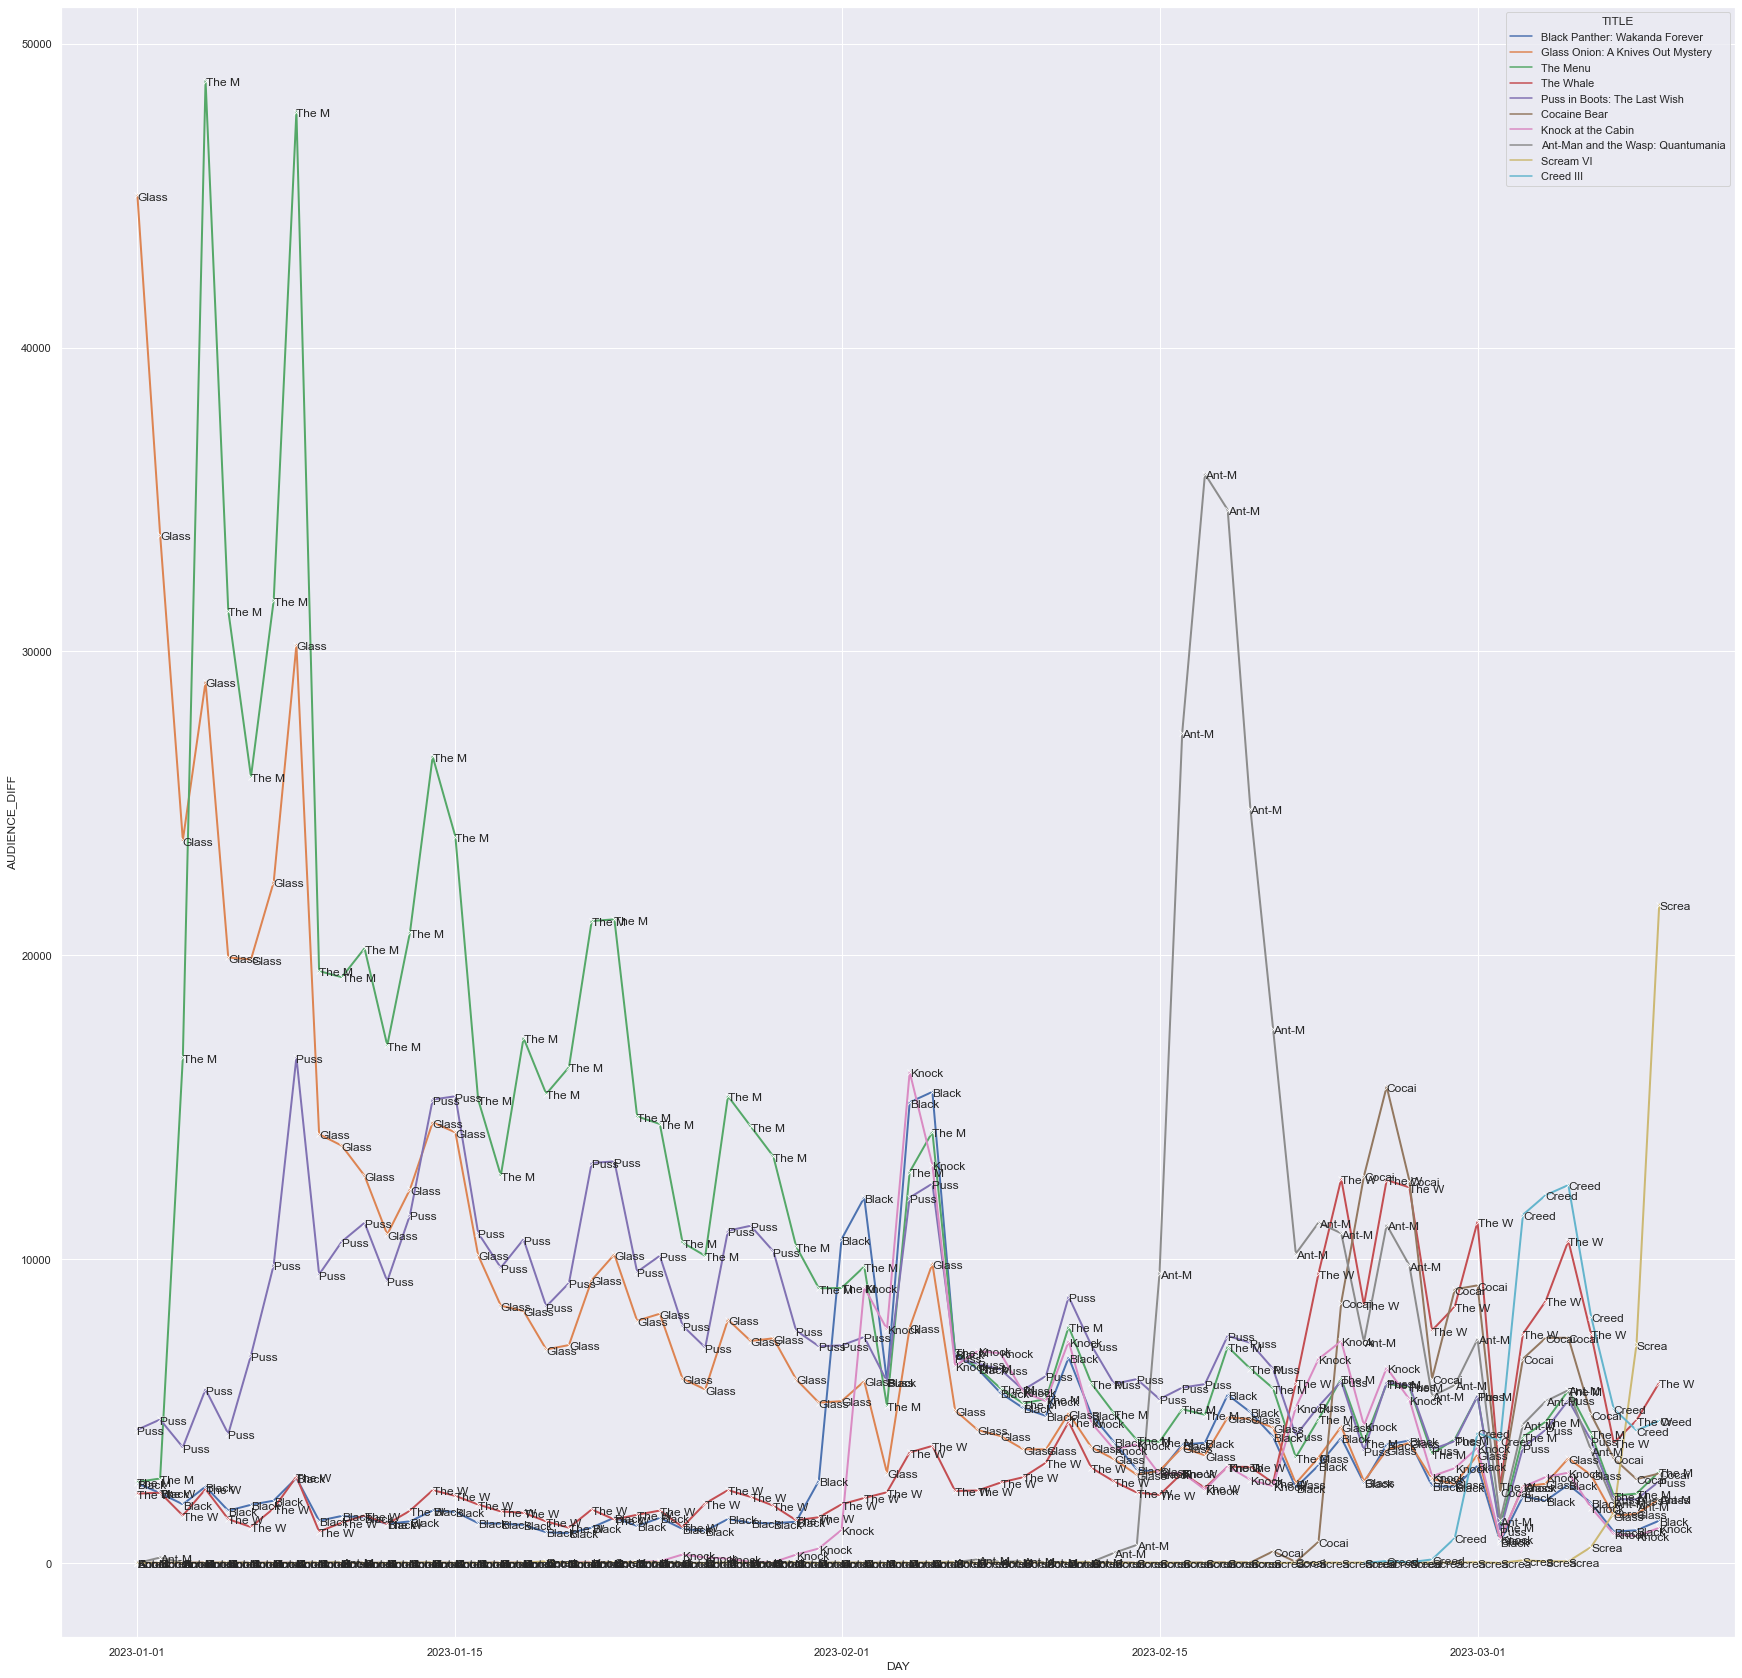

In [32]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(30,30)})

ax = sns.lineplot(data=PLOT_DF, x ='DAY', y = 'AUDIENCE_DIFF',
                  hue='TITLE', marker='x', #palette='viridis',
                  legend='full', lw=2)

for x, y, z in zip(PLOT_DF['DAY'], PLOT_DF['AUDIENCE_DIFF'], PLOT_DF['TITLE']):
    plt.text(x = x, y = y-150, # y-coordinate position of data label, adjusted to be 150 below the data point
    s = z[0:5]) #‘{:.0f}’.format(y), # data label, formatted to ignore decimals

### Most Watched Films on a Single Day
#### What are the films that received more views in a single day from the last N days?

In [33]:
N = 7 # The range equals N days (7 to cover last week, 30 to cover the last month)
last_file_index = max(ALL_FILM_NUMBERS_DF.FILE_INDEX) # most recent FILE_INDEX 
first_file_index = last_file_index - (N-1) # the initial FILE_INDEX of the intended range
FILTERED_DF = ALL_FILM_NUMBERS_DF[(ALL_FILM_NUMBERS_DF.AUDIENCE_DIFF != 'NEW') & (ALL_FILM_NUMBERS_DF.AUDIENCE_DIFF != 'OLD')]
FILTERED_DF = FILTERED_DF[FILTERED_DF.FILE_INDEX.between(first_file_index, last_file_index)]
FILTERED_DF['AUDIENCE_DIFF'] = FILTERED_DF['AUDIENCE_DIFF'].astype('int')
FILTERED_DF = FILTERED_DF.sort_values(by = 'AUDIENCE_DIFF', ascending=False).head(15)
FILTERED_DF[['SHORT_URL', 'AUDIENCE_DIFF', 'TOTAL_AUDIENCE','LIKES','FANS','REVIEWS','FILE_INDEX']]

,SHORT_URL,AUDIENCE_DIFF,TOTAL_AUDIENCE,LIKES,FANS,REVIEWS,FILE_INDEX
109976,scream-vi,21667,33384,14798,348,15761,74
103688,creed-iii,12439,46307,17473,275,17484,70
102071,creed-iii,12108,33868,12962,205,12995,69
100460,creed-iii,11460,21760,8257,131,8493,68
103132,the-whale-2022,10604,271980,83609,1213,88630,70
102736,triangle-of-sadness,8768,329180,98499,1432,90184,70
101515,the-whale-2022,8619,261376,80575,1176,86047,69
105312,creed-iii,8113,54420,20370,312,20385,71
102126,everything-everywhere-all-at-once,7743,1402386,717950,80723,397465,70
99904,the-whale-2022,7540,252757,78055,1151,83928,68


### Most "Liked/Heart" Movies (All Time)

In [34]:
last_file_index = max(ALL_FILM_NUMBERS_DF.FILE_INDEX) # most recent FILE_INDEX
ALL_FILM_NUMBERS_DF[ALL_FILM_NUMBERS_DF.FILE_INDEX == last_file_index].sort_values(by='LIKES', ascending=False).head(10)

,SHORT_URL,TITLE,RELEASE_YEAR,TOTAL_AUDIENCE,FANS,LIKES,REVIEWS,LISTS,DATE,FILE_INDEX,AUDIENCE_DIFF,FANS_DIFF,LIKES_DIFF,REVIEWS_DIFF
108627,parasite-2019,Parasite,2019,2399789,60220,1385692,213432,384918,2023-03-10 02:47:11.617213,74,2008,9,1229,103
108635,spider-man-into-the-spider-verse,Spider-Man: Into the Spider-Verse,2018,1956344,53890,1011989,148758,307968,2023-03-10 02:47:39.574287,74,1776,59,951,84
108638,the-dark-knight,The Dark Knight,2008,2223970,52273,987228,92490,312671,2023-03-10 02:47:53.690454,74,1870,55,827,98
108628,joker-2019,Joker,2019,2369277,15279,972170,159072,221465,2023-03-10 02:47:15.035217,74,2181,1,897,95
108629,fight-club,Fight Club,1999,2204686,68049,964529,143635,269541,2023-03-10 02:47:19.387653,74,2067,57,973,197
108631,knives-out-2019,Knives Out,2019,2099856,25997,949684,222938,234655,2023-03-10 02:47:26.127216,74,1875,20,885,80
108632,pulp-fiction,Pulp Fiction,1994,2147096,47460,948312,89298,281494,2023-03-10 02:47:29.497536,74,1820,61,796,125
108634,get-out-2017,Get Out,2017,2054493,14558,923083,112128,254217,2023-03-10 02:47:36.222935,74,1832,6,810,89
108636,inception,Inception,2010,2222687,38929,898649,83899,256338,2023-03-10 02:47:42.929949,74,1715,26,671,60
108640,interstellar,Interstellar,2014,1969577,92652,848250,113855,262863,2023-03-10 02:48:03.391908,74,1913,128,866,168


### Most "Liked/Heart" Movies during the past N days

In [35]:
N = 7 # The range equals N days
last_file_index = max(ALL_FILM_NUMBERS_DF.FILE_INDEX) # most recent FILE_INDEX 
first_file_index = last_file_index - (N-1) # the initial FILE_INDEX of the intended range
FILTERED_DF = ALL_FILM_NUMBERS_DF[(ALL_FILM_NUMBERS_DF.LIKES_DIFF != 'NEW') & (ALL_FILM_NUMBERS_DF.LIKES_DIFF != 'OLD')] # Records that are not 'NEW' or 'OLD', i.e. first records or returning titles
FILTERED_DF = FILTERED_DF[FILTERED_DF.FILE_INDEX.between(first_file_index, last_file_index)] # Records in the search range
FILTERED_DF['LIKES_DIFF'] = FILTERED_DF['LIKES_DIFF'].astype('int')
FILTERED_DF = FILTERED_DF.groupby('SHORT_URL').aggregate({'LIKES_DIFF':'sum','TOTAL_AUDIENCE':'max','LIKES':'max','FANS':'max','REVIEWS':'max'}).reset_index()
FILTERED_DF.sort_values('LIKES_DIFF', ascending=False).head(15)

,SHORT_URL,LIKES_DIFF,TOTAL_AUDIENCE,LIKES,FANS,REVIEWS
306,creed-iii,21508,68541,25428,342,25357
395,everything-everywhere-all-at-once,17889,1419062,726462,81561,401916
1463,the-whale-2022,14248,294103,90022,1269,94361
1028,scream-vi,14114,33384,14798,348,15761
952,puss-in-boots-the-last-wish,10645,543490,252237,5869,186271
1518,triangle-of-sadness,10223,348136,103343,1477,96238
286,cocaine-bear,9873,113501,33766,316,55121
889,parasite-2019,9390,2399789,1385692,60220,213432
1193,the-banshees-of-inisherin,8929,571192,214236,5713,164991
63,aftersun,8921,392062,174639,16442,126126


### Most "Favorited/Fans" Movies (All Time)

In [36]:
last_file_index = max(ALL_FILM_NUMBERS_DF.FILE_INDEX) # most recent FILE_INDEX
ALL_FILM_NUMBERS_DF[ALL_FILM_NUMBERS_DF.FILE_INDEX == last_file_index].sort_values(by='FANS', ascending=False).head(10)

,SHORT_URL,TITLE,RELEASE_YEAR,TOTAL_AUDIENCE,FANS,LIKES,REVIEWS,LISTS,DATE,FILE_INDEX,AUDIENCE_DIFF,FANS_DIFF,LIKES_DIFF,REVIEWS_DIFF
108640,interstellar,Interstellar,2014,1969577,92652,848250,113855,262863,2023-03-10 02:48:03.391908,74,1913,128,866,168
108639,everything-everywhere-all-at-once,Everything Everywhere All at Once,2022,1419062,81561,726462,401916,321089,2023-03-10 02:47:59.042278,74,4327,198,2206,1199
108644,la-la-land,La La Land,2016,1785495,75034,722538,169499,269354,2023-03-10 02:48:19.920006,74,1982,144,865,336
108629,fight-club,Fight Club,1999,2204686,68049,964529,143635,269541,2023-03-10 02:47:19.387653,74,2067,57,973,197
108641,whiplash-2014,Whiplash,2014,1704639,67508,786567,167122,253032,2023-03-10 02:48:08.793814,74,2251,90,1119,302
108627,parasite-2019,Parasite,2019,2399789,60220,1385692,213432,384918,2023-03-10 02:47:11.617213,74,2008,9,1229,103
108656,eternal-sunshine-of-the-spotless-mind,Eternal Sunshine of the Spotless Mind,2004,1483208,56555,615369,105287,227628,2023-03-10 02:49:16.475253,74,1252,65,579,142
108635,spider-man-into-the-spider-verse,Spider-Man: Into the Spider-Verse,2018,1956344,53890,1011989,148758,307968,2023-03-10 02:47:39.574287,74,1776,59,951,84
108638,the-dark-knight,The Dark Knight,2008,2223970,52273,987228,92490,312671,2023-03-10 02:47:53.690454,74,1870,55,827,98
108632,pulp-fiction,Pulp Fiction,1994,2147096,47460,948312,89298,281494,2023-03-10 02:47:29.497536,74,1820,61,796,125


### Most Favorited/Fans Movies during the past N days

In [37]:
N = 7 # The range equals N days
last_file_index = max(ALL_FILM_NUMBERS_DF.FILE_INDEX) # most recent FILE_INDEX 
first_file_index = last_file_index - (N-1) # the initial FILE_INDEX of the intended range
FILTERED_DF = ALL_FILM_NUMBERS_DF[(ALL_FILM_NUMBERS_DF.FANS_DIFF != 'NEW') & (ALL_FILM_NUMBERS_DF.FANS_DIFF != 'OLD')] # Records that are not 'NEW' or 'OLD', i.e. first records or returning titles
FILTERED_DF = FILTERED_DF[FILTERED_DF.FILE_INDEX.between(first_file_index, last_file_index)] # Records in the search range
FILTERED_DF['FANS_DIFF'] = FILTERED_DF['FANS_DIFF'].astype('int')
FILTERED_DF = FILTERED_DF.groupby('SHORT_URL').aggregate({'FANS_DIFF':'sum','TOTAL_AUDIENCE':'max','LIKES':'max','FANS':'max','REVIEWS':'max'}).reset_index()
FILTERED_DF.sort_values('FANS_DIFF', ascending=False).head(15)

,SHORT_URL,FANS_DIFF,TOTAL_AUDIENCE,LIKES,FANS,REVIEWS
395,everything-everywhere-all-at-once,1720,1419062,726462,81561,401916
664,la-la-land,1072,1785495,722538,75034,169499
589,interstellar,979,1969577,848250,92652,113855
63,aftersun,975,392062,174639,16442,126126
1023,scream,866,862856,300576,32497,108336
1583,whiplash-2014,662,1704639,786567,67508,167122
688,little-women-2019,487,1168657,511882,41760,149976
410,fantastic-mr-fox,483,1062224,431017,34556,97629
1108,spider-man-into-the-spider-verse,443,1956344,1011989,53890,148758
393,eternal-sunshine-of-the-spotless-mind,436,1483208,615369,56555,105287


### Most Reviewed Movies (All Time)

In [38]:
last_file_index = max(ALL_FILM_NUMBERS_DF.FILE_INDEX) # most recent FILE_INDEX
ALL_FILM_NUMBERS_DF[ALL_FILM_NUMBERS_DF.FILE_INDEX == last_file_index].sort_values(by='REVIEWS', ascending=False).head(10)

,SHORT_URL,TITLE,RELEASE_YEAR,TOTAL_AUDIENCE,FANS,LIKES,REVIEWS,LISTS,DATE,FILE_INDEX,AUDIENCE_DIFF,FANS_DIFF,LIKES_DIFF,REVIEWS_DIFF
108639,everything-everywhere-all-at-once,Everything Everywhere All at Once,2022,1419062,81561,726462,401916,321089,2023-03-10 02:47:59.042278,74,4327,198,2206,1199
108630,the-batman,The Batman,2022,1709404,30028,745296,365661,296354,2023-03-10 02:47:22.774866,74,1998,40,858,197
109009,the-menu-2022,The Menu,2022,1020585,2725,317234,295502,141855,2023-03-10 03:15:04.057644,74,3009,-11,926,527
108964,glass-onion-a-knives-out-mystery,Glass Onion: A Knives Out Mystery,2022,1176575,1475,362992,288796,153080,2023-03-10 03:11:48.555811,74,2104,-3,616,153
108637,spider-man-no-way-home,Spider-Man: No Way Home,2021,1693009,16131,706367,279640,314315,2023-03-10 02:47:48.287374,74,1842,-8,633,61
108674,nope,Nope,2022,971877,7356,358122,251250,198224,2023-03-10 02:50:34.094926,74,1334,10,515,163
109076,avatar-the-way-of-water,Avatar: The Way of Water,2022,779361,4064,252094,228732,134616,2023-03-10 03:19:59.924324,74,1648,5,396,236
108645,dune-2021,Dune,2021,1346926,12528,507891,226065,204955,2023-03-10 02:48:25.290781,74,1358,-2,456,71
108631,knives-out-2019,Knives Out,2019,2099856,25997,949684,222938,234655,2023-03-10 02:47:26.127216,74,1875,20,885,80
108687,doctor-strange-in-the-multiverse-of-madness,Doctor Strange in the Multiverse of Madness,2022,1048135,1210,250704,218092,207609,2023-03-10 02:51:26.993704,74,1264,0,215,46


### Most Reviewed Movies during the past N days

In [39]:
N = 7 # The range equals N days
last_file_index = max(ALL_FILM_NUMBERS_DF.FILE_INDEX) # most recent FILE_INDEX 
first_file_index = last_file_index - (N-1) # the initial FILE_INDEX of the intended range
FILTERED_DF = ALL_FILM_NUMBERS_DF[(ALL_FILM_NUMBERS_DF.REVIEWS_DIFF != 'NEW') & (ALL_FILM_NUMBERS_DF.REVIEWS_DIFF != 'OLD')] # Records that are not 'NEW' or 'OLD', i.e. first records or returning titles
FILTERED_DF = FILTERED_DF[FILTERED_DF.FILE_INDEX.between(first_file_index, last_file_index)] # Records in the search range
FILTERED_DF['REVIEWS_DIFF'] = FILTERED_DF['REVIEWS_DIFF'].astype('int')
FILTERED_DF = FILTERED_DF.groupby('SHORT_URL').aggregate({'REVIEWS_DIFF':'sum','TOTAL_AUDIENCE':'max','LIKES':'max','FANS':'max','REVIEWS':'max'}).reset_index()
FILTERED_DF.sort_values('REVIEWS_DIFF', ascending=False).head(15)

,SHORT_URL,REVIEWS_DIFF,TOTAL_AUDIENCE,LIKES,FANS,REVIEWS
306,creed-iii,21397,68541,25428,342,25357
286,cocaine-bear,15986,113501,33766,316,55121
1028,scream-vi,15761,33384,14798,348,15761
1518,triangle-of-sadness,12466,348136,103343,1477,96238
1463,the-whale-2022,12380,294103,90022,1269,94361
395,everything-everywhere-all-at-once,9431,1419062,726462,81561,401916
1599,women-talking,7925,90791,26201,365,29989
1160,tar-2022,7880,316265,103709,2821,101814
107,ant-man-and-the-wasp-quantumania,7205,258186,45594,147,100150
1193,the-banshees-of-inisherin,6651,571192,214236,5713,164991


## 5. Crossing Popularity, Ratings and Numbers Data

In [40]:
#LATEST_POP_DF = ALL_FILMS_POP_DF[ALL_FILMS_POP_DF.FILE_INDEX == last_file_index]
MERGE_DF = pd.merge(ALL_FILMS_POP_DF, ALL_FILM_RATINGS_DF, how='left', left_on = ['SHORT_URL','FILE_INDEX'], right_on = ['SHORT_URL','FILE_INDEX'])

In [41]:
MERGE_DF = pd.merge(MERGE_DF, ALL_FILM_NUMBERS_DF, how='left', left_on = ['SHORT_URL','FILE_INDEX'], right_on = ['SHORT_URL','FILE_INDEX'])

In [42]:
cols_to_keep = ['TITLE_x', 'RELEASE_YEAR', 'SHORT_URL', 'ID', 'MODE', 'POP_INDEX', 'POP_DIFF', 'FILE_INDEX', 
               'RATINGS', 'SUM', 'SUM_DIFF', 'MEAN', 'MEAN_IND', 'DISCORD', 'DISCORD_IND',
               'TOTAL_AUDIENCE', 'AUDIENCE_DIFF', 'FANS_y', 'FANS_DIFF', 'LIKES', 'LIKES_DIFF', 'REVIEWS', 'REVIEWS_DIFF', 'LISTS']
MERGE_DF = MERGE_DF[cols_to_keep]
new_cols_names = ['TITLE', 'RELEASE_YEAR', 'SHORT_URL', 'ID', 'MODE', 'POP_INDEX', 'POP_DIFF', 'FILE_INDEX', 
               'RATINGS', 'N_RATINGS', 'RATINGS_DIFF', 'MEAN', 'MEAN_IND', 'DISCORD', 'DISCORD_IND',
               'TOTAL_AUDIENCE', 'AUDIENCE_DIFF', 'FANS', 'FANS_DIFF', 'LIKES', 'LIKES_DIFF', 'REVIEWS', 'REVIEWS_DIFF', 'LISTS']
MERGE_DF.columns = new_cols_names

### 5.1 What are the Best-Rated Films of All-Time

In [43]:
last_file_index = max(MERGE_DF.FILE_INDEX) # most recent FILE_INDEX 
cols_to_keep = ['TITLE', 'RELEASE_YEAR', 'SHORT_URL', 'N_RATINGS', 'MEAN', 'DISCORD', 'TOTAL_AUDIENCE']
FILTERED_DF = MERGE_DF[(MERGE_DF.FILE_INDEX == last_file_index) & (MERGE_DF.MODE == 'YEAR')][cols_to_keep]

#### Best-Rated Most Popular Titles (more than 100.000 reviewers) of All-Time

In [44]:
FILTERED_DF[FILTERED_DF.N_RATINGS >= 100000].sort_values(by='MEAN', ascending = False).head(15)

,TITLE,RELEASE_YEAR,SHORT_URL,N_RATINGS,MEAN,DISCORD,TOTAL_AUDIENCE
299699,Come and See,1985,come-and-see,149747.0,4.576315,0.288835,200208
299392,Parasite,2019,parasite-2019,1762167.0,4.573782,0.271615,2399789
299444,The Godfather,1972,the-godfather,801494.0,4.537655,0.302694,1307280
299591,The Godfather: Part II,1974,the-godfather-part-ii,440802.0,4.536693,0.284990,736189
299649,12 Angry Men,1957,12-angry-men,369240.0,4.518650,0.277663,591979
299913,Seven Samurai,1954,seven-samurai,166343.0,4.514209,0.280714,269520
300070,Chernobyl,2019,chernobyl,242569.0,4.495366,0.271572,381339
299475,The Shawshank Redemption,1994,the-shawshank-redemption,809299.0,4.487078,0.290651,1329866
299428,Spirited Away,2001,spirited-away,1029768.0,4.476411,0.300188,1654515
299422,The Dark Knight,2008,the-dark-knight,1371918.0,4.449077,0.301171,2223970


#### Best-Rated Most Popular Titles (more than 100.000 reviewers) of 2022

In [45]:
FILTERED_DF[(FILTERED_DF.N_RATINGS >= 100000) & (FILTERED_DF.RELEASE_YEAR.between(2021,2023))].sort_values(by='MEAN', ascending = False).head(50)

,TITLE,RELEASE_YEAR,SHORT_URL,N_RATINGS,MEAN,DISCORD,TOTAL_AUDIENCE
299379,Everything Everywhere All at Once,2022,everything-everywhere-all-at-once,1194719.0,4.429548,0.353431,1419062
299377,Puss in Boots: The Last Wish,2022,puss-in-boots-the-last-wish,475867.0,4.271333,0.290973,543490
299383,Aftersun,2022,aftersun,333725.0,4.251258,0.329967,392062
299465,Marcel the Shell with Shoes On,2021,marcel-the-shell-with-shoes-on-2021,126980.0,4.239313,0.318717,149119
300073,Bo Burnham: Inside,2021,bo-burnham-inside,307310.0,4.195215,0.402907,438822
299464,RRR,2022,rrr,148485.0,4.165869,0.350624,176226
299855,Drive My Car,2021,drive-my-car,199501.0,4.135017,0.333548,251611
299539,The Worst Person in the World,2021,the-worst-person-in-the-world,301839.0,4.123066,0.332036,376331
299380,The Banshees of Inisherin,2022,the-banshees-of-inisherin,487142.0,4.105600,0.299557,571192
300243,C'mon C'mon,2021,cmon-cmon,127341.0,4.095445,0.330131,156078


#### Best-Rated Least Popular Titles (between 25.000 and 100.000 reviewers) of 2022

In [46]:
FILTERED_DF[(FILTERED_DF.N_RATINGS.between(25000,100000)) & (FILTERED_DF.RELEASE_YEAR.between(2021,2023))].sort_values(by='MEAN', ascending = False).head(25)

,TITLE,RELEASE_YEAR,SHORT_URL,N_RATINGS,MEAN,DISCORD,TOTAL_AUDIENCE
299579,"Argentina, 1985",2022,argentina-1985,72709.0,4.130740,0.314437,85046
299496,Close,2022,close-2022,59689.0,4.045871,0.338627,70937
300342,Petite Maman,2021,petite-maman,74687.0,4.033031,0.315936,93904
299631,Fire of Love,2022,fire-of-love-2022,59663.0,4.014967,0.286504,74190
299954,Scream VI,2023,scream-vi,27244.0,3.954540,0.366706,33384
300033,Cha Cha Real Smooth,2022,cha-cha-real-smooth,85584.0,3.845690,0.351958,101059
299911,After Yang,2021,after-yang,81287.0,3.830625,0.339304,99372
300257,On the Count of Three,2021,on-the-count-of-three,43846.0,3.823405,0.304589,51815
299753,The Woman King,2022,the-woman-king,92251.0,3.794154,0.347561,108159
299426,Women Talking,2022,women-talking,76729.0,3.786235,0.359180,90791


### 5.2 What are Most Divisive Films?

#### Most Divisive Films of All-Time

In [47]:
FILTERED_DF[FILTERED_DF.N_RATINGS >= 100000].sort_values(by='DISCORD', ascending = False).head(15)

,TITLE,RELEASE_YEAR,SHORT_URL,N_RATINGS,MEAN,DISCORD,TOTAL_AUDIENCE
300111,The Twilight Saga: Breaking Dawn - Part 2,2012,the-twilight-saga-breaking-dawn-part-2,208715.0,2.826896,0.592253,470081
299615,Twilight,2008,twilight-2008,467526.0,2.950485,0.590035,966716
300141,The Twilight Saga: Breaking Dawn - Part 1,2011,the-twilight-saga-breaking-dawn-part-1,205679.0,2.637046,0.582838,467933
299964,The Twilight Saga: New Moon,2009,the-twilight-saga-new-moon,255235.0,2.622716,0.558556,570436
300126,Morbius,2022,morbius,192707.0,1.850050,0.541880,235500
300081,The Twilight Saga: Eclipse,2010,the-twilight-saga-eclipse,223289.0,2.637741,0.540550,512623
300181,Grown Ups,2010,grown-ups,187152.0,2.818864,0.539361,371795
299723,Blonde,2022,blonde-2022,150516.0,2.084944,0.532727,185904
299971,White Chicks,2004,white-chicks,183737.0,3.288595,0.529970,384289
300347,High School Musical 2,2007,high-school-musical-2,157966.0,3.195637,0.521912,419992


#### Most Divisive Popular Films of 2022

In [48]:
FILTERED_DF[(FILTERED_DF.N_RATINGS >= 100000)  & (FILTERED_DF.RELEASE_YEAR.between(2021,2023))].sort_values(by='DISCORD', ascending = False).head(25)

,TITLE,RELEASE_YEAR,SHORT_URL,N_RATINGS,MEAN,DISCORD,TOTAL_AUDIENCE
300126,Morbius,2022,morbius,192707.0,1.850050,0.541880,235500
299723,Blonde,2022,blonde-2022,150516.0,2.084944,0.532727,185904
299788,Minions: The Rise of Gru,2022,minions-the-rise-of-gru,247037.0,3.394419,0.469370,326950
300199,The Matrix Resurrections,2021,the-matrix-resurrections,261377.0,2.841424,0.468773,349409
300288,Halloween Ends,2022,halloween-ends,148369.0,2.299109,0.465453,174637
299832,Men,2022,men-2022,158725.0,2.861707,0.452266,190336
299994,Venom: Let There Be Carnage,2021,venom-let-there-be-carnage,316463.0,2.682892,0.448892,432746
299684,Eternals,2021,eternals,511780.0,2.975261,0.448616,684460
299986,Malignant,2021,malignant-2021,239329.0,3.147001,0.447810,296590
299779,Old,2021,old-2021,256740.0,2.530576,0.447772,329819


#### Most Divisive Least Popular Films of 2022

In [49]:
FILTERED_DF[(FILTERED_DF.N_RATINGS.between(30000,100000))  & (FILTERED_DF.RELEASE_YEAR.between(2021,2023))].sort_values(by='DISCORD', ascending = False).head(15)

,TITLE,RELEASE_YEAR,SHORT_URL,N_RATINGS,MEAN,DISCORD,TOTAL_AUDIENCE
299436,Skinamarink,2022,skinamarink,77360.0,3.005041,0.557207,92254
299947,Terrifier 2,2022,terrifier-2,86053.0,3.009750,0.486720,99715
300237,We're All Going to the World's Fair,2021,were-all-going-to-the-worlds-fair,53396.0,3.114297,0.460634,67136
299777,"BARDO, False Chronicle of a Handful of Truths",2022,bardo-false-chronicle-of-a-handful-of-truths,45734.0,3.553680,0.442873,54832
299405,Cocaine Bear,2023,cocaine-bear,99936.0,3.192093,0.436138,113501
300266,My Policeman,2022,my-policeman,79565.0,3.275856,0.432735,93711
299594,Your Place or Mine,2023,your-place-or-mine-2023,49419.0,2.380603,0.423548,61361
300318,The Invitation,2022,the-invitation-2022-1,51244.0,2.379840,0.420290,61110
299463,You People,2023,you-people-2023,85878.0,2.407683,0.418382,104317
299925,Fall,2022,fall-2022,88844.0,2.710588,0.411528,105156


### 5.3 What are the Most Universally Acclaimed Films?

In [50]:
FILTERED_DF[(FILTERED_DF.MEAN >= 3.7) & (FILTERED_DF.N_RATINGS >= 25000)  & (FILTERED_DF.RELEASE_YEAR.between(2021,2023))].sort_values(by='DISCORD', ascending = True).head(45)

,TITLE,RELEASE_YEAR,SHORT_URL,N_RATINGS,MEAN,DISCORD,TOTAL_AUDIENCE
300183,Judas and the Black Messiah,2021,judas-and-the-black-messiah,218236.0,4.015527,0.283776,279743
299631,Fire of Love,2022,fire-of-love-2022,59663.0,4.014967,0.286504,74190
299377,Puss in Boots: The Last Wish,2022,puss-in-boots-the-last-wish,475867.0,4.271333,0.290973,543490
299487,Creed III,2023,creed-iii,60530.0,3.781844,0.296566,68541
299380,The Banshees of Inisherin,2022,the-banshees-of-inisherin,487142.0,4.105600,0.299557,571192
300257,On the Count of Three,2021,on-the-count-of-three,43846.0,3.823405,0.304589,51815
299390,All Quiet on the Western Front,2022,all-quiet-on-the-western-front-2022,286786.0,3.962660,0.306084,336033
299731,Broker,2022,broker-2022,45008.0,3.748134,0.311523,55612
299443,Decision to Leave,2022,decision-to-leave,169251.0,3.916783,0.313440,207676
299579,"Argentina, 1985",2022,argentina-1985,72709.0,4.130740,0.314437,85046


In [51]:
FILTERED_DF[(FILTERED_DF.MEAN >= 3.7) & (FILTERED_DF.N_RATINGS >= 100000)  ].sort_values(by='DISCORD', ascending = True).head(45)

,TITLE,RELEASE_YEAR,SHORT_URL,N_RATINGS,MEAN,DISCORD,TOTAL_AUDIENCE
300070,Chernobyl,2019,chernobyl,242569.0,4.495366,0.271572,381339
299392,Parasite,2019,parasite-2019,1762167.0,4.573782,0.271615,2399789
300258,Paths of Glory,1957,paths-of-glory,123349.0,4.334762,0.274419,184691
299710,Memories of Murder,2003,memories-of-murder,259120.0,4.306267,0.276060,350392
299649,12 Angry Men,1957,12-angry-men,369240.0,4.518650,0.277663,591979
299608,Sound of Metal,2019,sound-of-metal,372551.0,4.139223,0.277701,472971
300067,The King of Comedy,1982,the-king-of-comedy,161070.0,4.147790,0.278142,228744
300327,Shoplifters,2018,shoplifters,156653.0,4.190756,0.279670,220732
299913,Seven Samurai,1954,seven-samurai,166343.0,4.514209,0.280714,269520
300034,The Father,2020,the-father-2020,203981.0,4.227107,0.282228,258797


### Most Popular Titles from the past N days with their numbers

In [52]:
N = 31 # The range equals N days
last_file_index = max(MERGE_DF.FILE_INDEX) # most recent FILE_INDEX 
first_file_index = last_file_index - (N-1) # the initial FILE_INDEX of the intended range

FILTERED_DF = MERGE_DF[MERGE_DF.FILE_INDEX.between(first_file_index,last_file_index)]
FILTERED_DF = FILTERED_DF[['TITLE', 'RELEASE_YEAR','SHORT_URL','TOTAL_AUDIENCE','N_RATINGS','POP_INDEX','FILE_INDEX','MODE','AUDIENCE_DIFF']]
FILTERED_DF['AUDIENCE_DIFF'] = FILTERED_DF['AUDIENCE_DIFF'].str.replace('NEW','0')
FILTERED_DF['AUDIENCE_DIFF'] = FILTERED_DF['AUDIENCE_DIFF'].str.replace('OLD','0')
FILTERED_DF = FILTERED_DF[(FILTERED_DF.AUDIENCE_DIFF != 'NEW') & (FILTERED_DF.AUDIENCE_DIFF != 'OLD') & (~FILTERED_DF.AUDIENCE_DIFF.isna())]
FILTERED_DF = FILTERED_DF[FILTERED_DF.MODE == 'WEEK']
FILTERED_DF['AUDIENCE_DIFF'] = FILTERED_DF['AUDIENCE_DIFF'].astype('int')
#FILTERED_DF.sort_values(by='AUDIENCE_DIFF', ascending = False)

In [53]:
FILTERED_DF['AUDIENCE_ACCUM'] = FILTERED_DF['AUDIENCE_DIFF']
GROUPED_DF = FILTERED_DF.groupby(['TITLE','RELEASE_YEAR','SHORT_URL']).agg({'TOTAL_AUDIENCE':max,'AUDIENCE_DIFF':max,'AUDIENCE_ACCUM':sum, 'POP_INDEX':min}).reset_index()
GROUPED_DF.sort_values(by='AUDIENCE_ACCUM', ascending = False).head(30)

,TITLE,RELEASE_YEAR,SHORT_URL,TOTAL_AUDIENCE,AUDIENCE_DIFF,AUDIENCE_ACCUM,POP_INDEX
74,Ant-Man and the Wasp: Quantumania,2023,ant-man-and-the-wasp-quantumania,258186,35840,256720,1
1106,The Whale,2022,the-whale-2022,294103,12642,180912,2
706,Puss in Boots: The Last Wish,2022,puss-in-boots-the-last-wish,543490,8767,160439,1
1033,The Menu,2022,the-menu-2022,1020585,7779,149241,4
295,Everything Everywhere All at Once,2022,everything-everywhere-all-at-once,1419062,7743,143436,4
895,The Banshees of Inisherin,2022,the-banshees-of-inisherin,571192,6078,122166,4
482,Knock at the Cabin,2023,knock-at-the-cabin,175927,7302,120335,1
128,Black Panther: Wakanda Forever,2022,black-panther-wakanda-forever,593769,6766,107758,4
346,Glass Onion: A Knives Out Mystery,2022,glass-onion-a-knives-out-mystery,1176575,4929,102872,11
215,Cocaine Bear,2023,cocaine-bear,113501,15679,100174,1


In [54]:
# sympathy-for-lady-vengeance is now lady-vengeance